In [31]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json

In [32]:
api_url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}"

In [84]:
params = {
    "project": "en.wikipedia",   # If you want to filter by project, use the domain of any Wikimedia project, for example 'en.wikipedia.org', 'www.mediawiki.org' or 'commons.wikimedia.org'.
    "access": "all-access",      # all-access, desktop, mobile-app, mobile-web
    "agent": "user",            # all-agent, user, spider, automated
    "article": "Covid-19",      # Specify the article title
    "granularity": "monthly",    # daily, monthly
    "start": "20180101",      # date in YYYYMMDD or YYYYMMDDHH 
    "end": "20230101"         # date in YYYYMMDD or YYYYMMDDHH 
}

headers = {
    "User-Agent": "WikiWackyNews/1.0 (tecla.bottinellimontandon@gmail.com)"
}

# Make the API request
response = requests.get(api_url.format(**params), headers=headers)

# Save the data as a JSON file
if response.status_code == 200:
    data = response.json()
    with open("api_data.json", "w") as json_file:
        json.dump(data, json_file)
        print("Data saved as api_data.json")
        

Data saved as api_data.json


In [85]:
with open("api_data.json") as data:
    dictionary = json.load(data)
item_list = dictionary["items"]

df = pd.DataFrame(item_list).copy()

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')
df

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Covid-19,monthly,2020-02-01,all-access,user,44266
1,en.wikipedia,Covid-19,monthly,2020-03-01,all-access,user,285655
2,en.wikipedia,Covid-19,monthly,2020-04-01,all-access,user,100530
3,en.wikipedia,Covid-19,monthly,2020-05-01,all-access,user,38937
4,en.wikipedia,Covid-19,monthly,2020-06-01,all-access,user,17733
5,en.wikipedia,Covid-19,monthly,2020-07-01,all-access,user,18225
6,en.wikipedia,Covid-19,monthly,2020-08-01,all-access,user,13427
7,en.wikipedia,Covid-19,monthly,2020-09-01,all-access,user,13983
8,en.wikipedia,Covid-19,monthly,2020-10-01,all-access,user,13551
9,en.wikipedia,Covid-19,monthly,2020-11-01,all-access,user,12759


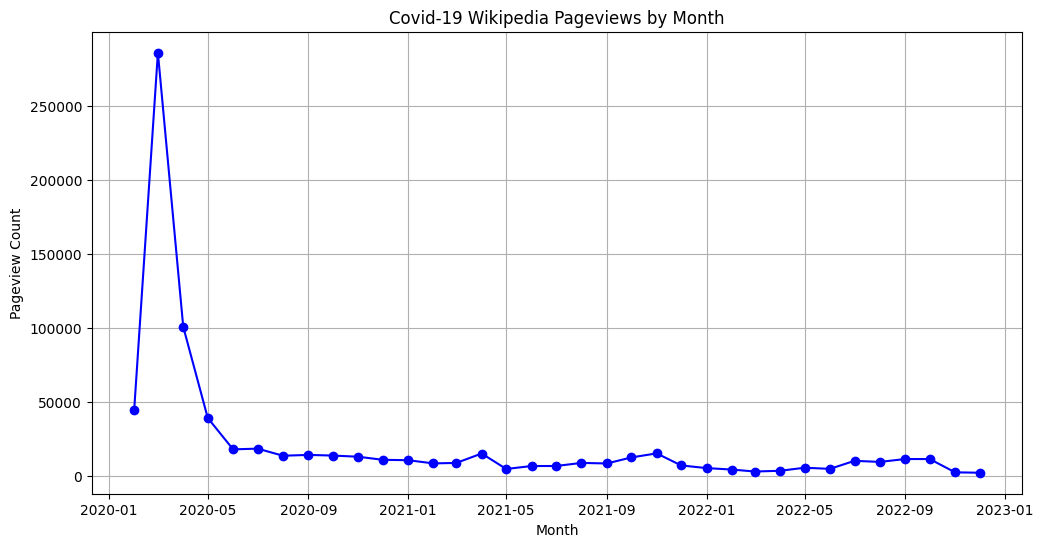

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['views'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Pageview Count')
plt.title('Covid-19 Wikipedia Pageviews by Month')
plt.grid(True)

plt.show()